# Interactive Depth Plots and Cross Plots using Altair

The objective of this program is to read in a las file and plot the data using Altair which allows for inteactive, dynamic linking of the data.

### Example Output using Altair to demonstrate the interactivity of this python package:
This is an animated gif image that is used in this demonstration. 

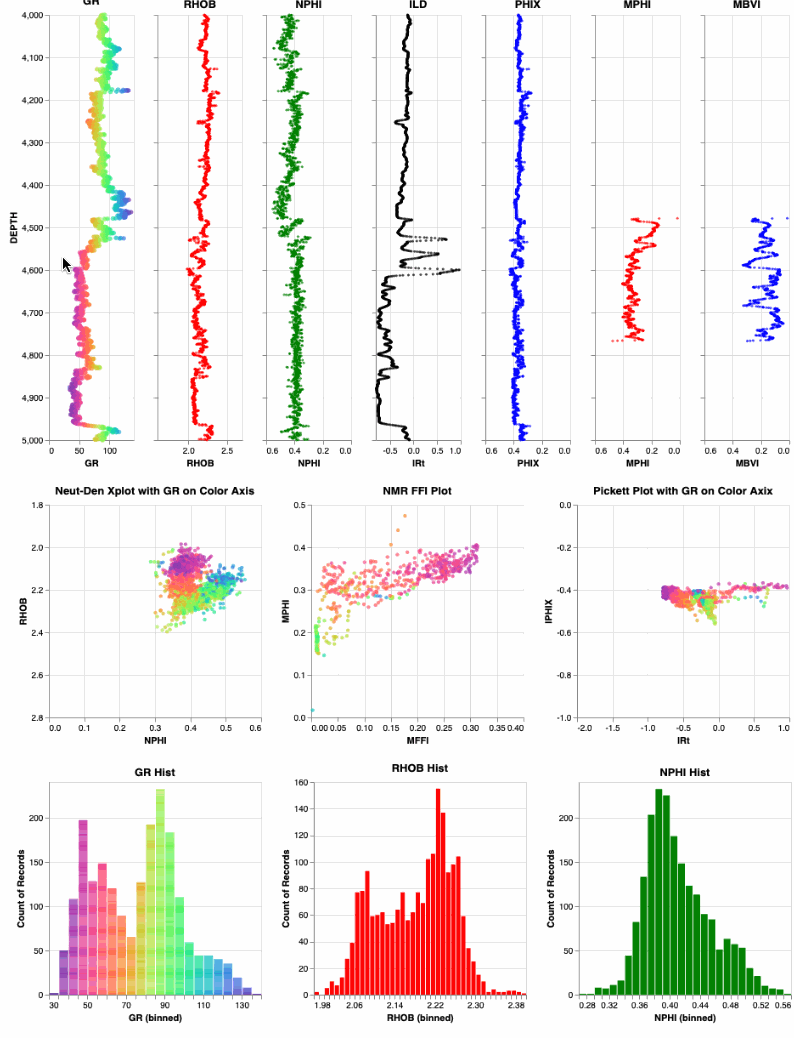

### Load Python requirements:

In [1]:
from pandas import DataFrame, read_csv

import altair as alt
#alt.renderers.enable('altair_viewer')

import pandas as pd
import numpy as np
import altair_transform
import lasio

#read the file
#file = r'GulfCoast_NMR.xlsx'
#df = pd.read_excel(file,index_col=False)



### 1) Load Data:

Gulf Coast Shaley-Sand log with NMR

### We will first read in a las file using Lasio and then create a pandas DataFrame:
#### There is an issue in that the second line related to units and the depth plot will not read from this type of DataFrame.

In [2]:
las = lasio.read("GulfCoast_NMR.las")
df = las.df()
df.head(20)

BS  BVW     CALI  DT       GR     ILD     ILM     LL8     LPHIX  \
DEPTH                                                                     
4000.0 NaN  NaN  10.8300 NaN  92.0480  0.7480  0.7480  0.7170 -0.572062   
4000.5 NaN  NaN  11.1512 NaN  89.0188  0.7503  0.7508  0.7205 -0.570101   
4001.0 NaN  NaN  10.9470 NaN  87.8280  0.7520  0.7550  0.7180 -0.570101   
4001.5 NaN  NaN  11.1852 NaN  86.1570  0.7557  0.7608  0.7347 -0.574525   
4002.0 NaN  NaN  11.3960 NaN  87.1020  0.7590  0.7650  0.7330 -0.582000   
4002.5 NaN  NaN  11.3663 NaN  86.6840  0.7613  0.7703  0.7482 -0.584015   
4003.0 NaN  NaN  10.9230 NaN  88.2340  0.7630  0.7720  0.7490 -0.589095   
4003.5 NaN  NaN  11.1030 NaN  86.2360  0.7642  0.7738  0.7558 -0.580495   
4004.0 NaN  NaN  11.0780 NaN  87.0210  0.7650  0.7730  0.7350 -0.588074   
4004.5 NaN  NaN  10.9400 NaN  85.6867  0.7672  0.7720  0.7277 -0.590938   
4005.0 NaN  NaN  10.9750 NaN  85.9700  0.7680  0.7720  0.7260 -0.605761   
4005.5 NaN  NaN  10.9912 NaN  86.4540  0.7683  0.7733  0.7472 -0.607890   
4006.0 NaN  NaN  10.6220 NaN  88.1940  0.7700  0.7750  0.7530 -0.607890   
4006.5 NaN  NaN  10.5360 NaN  86.3415  0.7747  0.7785  0.7568 -0.599436   
4007.0 NaN  NaN  10.6210 NaN  85.0240  0.7780  0.7810  0.7560 -0.599436   
4007.5 NaN  NaN  10.8557 NaN  86.0700  0.7840  0.7868  0.7560 -0.604171   
4008.0 NaN  NaN  10.7090 NaN  90.4650  0.7890  0.7910  0.7660 -0.606824   
4008.5 NaN  NaN  10.6580 NaN  90.0973  0.7973  0.7993  0.7738 -0.614556   
4009.0 NaN  NaN  10.6630 NaN  93.4290  0.8040  0.8060  0.7780 -0.620887   
4009.5 NaN  NaN  10.6607 NaN  93.0287  0.8135  0.8165  0.7922 -0.622870   

             LRT  MBVI  MFFI  MPHI      NPHI      PHIX    RHOB    RMLL  \
DEPTH                                                                    
4000.0 -0.126098   NaN   NaN   NaN  0.437160  0.267879  2.2080  0.7170   
4000.5 -0.124765   NaN   NaN   NaN  0.420900  0.269091  2.2060  0.7205   
4001.0 -0.123782   NaN   NaN   NaN  0.420200  0.269091  2.2060  0.7180   
4001.5 -0.121651   NaN   NaN   NaN  0.425797  0.266364  2.2105  0.7347   
4002.0 -0.119758   NaN   NaN   NaN  0.433530  0.261818  2.2180  0.7330   
4002.5 -0.118444   NaN   NaN   NaN  0.444067  0.260606  2.2200  0.7482   
4003.0 -0.117475   NaN   NaN   NaN  0.436650  0.257576  2.2250  0.7490   
4003.5 -0.116793   NaN   NaN   NaN  0.438613  0.262727  2.2165  0.7558   
4004.0 -0.116339   NaN   NaN   NaN  0.467280  0.258182  2.2240  0.7350   
4004.5 -0.115091   NaN   NaN   NaN  0.476572  0.256485  2.2268  0.7277   
4005.0 -0.114639   NaN   NaN   NaN  0.486630  0.247879  2.2410  0.7260   
4005.5 -0.114469   NaN   NaN   NaN  0.491972  0.246667  2.2430  0.7472   
4006.0 -0.113509   NaN   NaN   NaN  0.487380  0.246667  2.2430  0.7530   
4006.5 -0.110866   NaN   NaN   NaN  0.464058  0.251515  2.2350  0.7568   
4007.0 -0.109020   NaN   NaN   NaN  0.421300  0.251515  2.2350  0.7560   
4007.5 -0.105684   NaN   NaN   NaN  0.417227  0.248788  2.2395  0.7560   
4008.0 -0.102923   NaN   NaN   NaN  0.419960  0.247273  2.2420  0.7660   
4008.5 -0.098378   NaN   NaN   NaN  0.446342  0.242909  2.2492  0.7738   
4009.0 -0.094744   NaN   NaN   NaN  0.453000  0.239394  2.2550  0.7780   
4009.5 -0.089642   NaN   NaN   NaN  0.427683  0.238303  2.2568  0.7922   

             SP  SW  
DEPTH                
4000.0 -29.8130 NaN  
4000.5 -28.6983 NaN  
4001.0 -28.1250 NaN  
4001.5 -27.6047 NaN  
4002.0 -27.1880 NaN  
4002.5 -26.4692 NaN  
4003.0 -27.2500 NaN  
4003.5 -26.5208 NaN  
4004.0 -26.6250 NaN  
4004.5 -27.1355 NaN  
4005.0 -27.8130 NaN  
4005.5 -28.6250 NaN  
4006.0 -28.0000 NaN  
4006.5 -27.8855 NaN  
4007.0 -27.9380 NaN  
4007.5 -28.0422 NaN  
4008.0 -28.5630 NaN  
4008.5 -27.5938 NaN  
4009.0 -27.4380 NaN  
4009.5 -26.5108 NaN

### We will now convert the DataFrame so that the DataFrame header is all on one line:

In [3]:
df = df.rename_axis('DEPTH').reset_index()
df.head(20)

DEPTH  BS  BVW     CALI  DT       GR     ILD     ILM     LL8     LPHIX  \
0   4000.0 NaN  NaN  10.8300 NaN  92.0480  0.7480  0.7480  0.7170 -0.572062   
1   4000.5 NaN  NaN  11.1512 NaN  89.0188  0.7503  0.7508  0.7205 -0.570101   
2   4001.0 NaN  NaN  10.9470 NaN  87.8280  0.7520  0.7550  0.7180 -0.570101   
3   4001.5 NaN  NaN  11.1852 NaN  86.1570  0.7557  0.7608  0.7347 -0.574525   
4   4002.0 NaN  NaN  11.3960 NaN  87.1020  0.7590  0.7650  0.7330 -0.582000   
5   4002.5 NaN  NaN  11.3663 NaN  86.6840  0.7613  0.7703  0.7482 -0.584015   
6   4003.0 NaN  NaN  10.9230 NaN  88.2340  0.7630  0.7720  0.7490 -0.589095   
7   4003.5 NaN  NaN  11.1030 NaN  86.2360  0.7642  0.7738  0.7558 -0.580495   
8   4004.0 NaN  NaN  11.0780 NaN  87.0210  0.7650  0.7730  0.7350 -0.588074   
9   4004.5 NaN  NaN  10.9400 NaN  85.6867  0.7672  0.7720  0.7277 -0.590938   
10  4005.0 NaN  NaN  10.9750 NaN  85.9700  0.7680  0.7720  0.7260 -0.605761   
11  4005.5 NaN  NaN  10.9912 NaN  86.4540  0.7683  0.7733  0.7472 -0.607890   
12  4006.0 NaN  NaN  10.6220 NaN  88.1940  0.7700  0.7750  0.7530 -0.607890   
13  4006.5 NaN  NaN  10.5360 NaN  86.3415  0.7747  0.7785  0.7568 -0.599436   
14  4007.0 NaN  NaN  10.6210 NaN  85.0240  0.7780  0.7810  0.7560 -0.599436   
15  4007.5 NaN  NaN  10.8557 NaN  86.0700  0.7840  0.7868  0.7560 -0.604171   
16  4008.0 NaN  NaN  10.7090 NaN  90.4650  0.7890  0.7910  0.7660 -0.606824   
17  4008.5 NaN  NaN  10.6580 NaN  90.0973  0.7973  0.7993  0.7738 -0.614556   
18  4009.0 NaN  NaN  10.6630 NaN  93.4290  0.8040  0.8060  0.7780 -0.620887   
19  4009.5 NaN  NaN  10.6607 NaN  93.0287  0.8135  0.8165  0.7922 -0.622870   

         LRT  MBVI  MFFI  MPHI      NPHI      PHIX    RHOB    RMLL       SP  \
0  -0.126098   NaN   NaN   NaN  0.437160  0.267879  2.2080  0.7170 -29.8130   
1  -0.124765   NaN   NaN   NaN  0.420900  0.269091  2.2060  0.7205 -28.6983   
2  -0.123782   NaN   NaN   NaN  0.420200  0.269091  2.2060  0.7180 -28.1250   
3  -0.121651   NaN   NaN   NaN  0.425797  0.266364  2.2105  0.7347 -27.6047   
4  -0.119758   NaN   NaN   NaN  0.433530  0.261818  2.2180  0.7330 -27.1880   
5  -0.118444   NaN   NaN   NaN  0.444067  0.260606  2.2200  0.7482 -26.4692   
6  -0.117475   NaN   NaN   NaN  0.436650  0.257576  2.2250  0.7490 -27.2500   
7  -0.116793   NaN   NaN   NaN  0.438613  0.262727  2.2165  0.7558 -26.5208   
8  -0.116339   NaN   NaN   NaN  0.467280  0.258182  2.2240  0.7350 -26.6250   
9  -0.115091   NaN   NaN   NaN  0.476572  0.256485  2.2268  0.7277 -27.1355   
10 -0.114639   NaN   NaN   NaN  0.486630  0.247879  2.2410  0.7260 -27.8130   
11 -0.114469   NaN   NaN   NaN  0.491972  0.246667  2.2430  0.7472 -28.6250   
12 -0.113509   NaN   NaN   NaN  0.487380  0.246667  2.2430  0.7530 -28.0000   
13 -0.110866   NaN   NaN   NaN  0.464058  0.251515  2.2350  0.7568 -27.8855   
14 -0.109020   NaN   NaN   NaN  0.421300  0.251515  2.2350  0.7560 -27.9380   
15 -0.105684   NaN   NaN   NaN  0.417227  0.248788  2.2395  0.7560 -28.0422   
16 -0.102923   NaN   NaN   NaN  0.419960  0.247273  2.2420  0.7660 -28.5630   
17 -0.098378   NaN   NaN   NaN  0.446342  0.242909  2.2492  0.7738 -27.5938   
18 -0.094744   NaN   NaN   NaN  0.453000  0.239394  2.2550  0.7780 -27.4380   
19 -0.089642   NaN   NaN   NaN  0.427683  0.238303  2.2568  0.7922 -26.5108   

    SW  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN  
5  NaN  
6  NaN  
7  NaN  
8  NaN  
9  NaN  
10 NaN  
11 NaN  
12 NaN  
13 NaN  
14 NaN  
15 NaN  
16 NaN  
17 NaN  
18 NaN  
19 NaN

### 2) Use Altair over Entire Well Interval: now we can work with Altair Interactivity Depth, Cross Plots and Histograms:

In [4]:
#interval = alt.selection_interval()
#vega.scheme('basic', ['#f00', '#0f0', '#00f', '#ff0', '#f0f', '#0ff']);
interval = alt.selection_interval()


base=alt.Chart(df).mark_point().encode(
    alt.Y('DEPTH:Q',
        scale=alt.Scale(domain=(5000, 4000))
    ),
).properties(
    width=100,
    height=800,
    #title='GR',
    selection=interval
)

base2=alt.Chart(df).mark_point().encode(
    alt.Y('DEPTH:Q',
        scale=alt.Scale(domain=(5000, 4000)), axis=alt.Axis(labels=False),title='',
    ),
).properties(
    width=100,
    height=800,
    title='',
    selection=interval
)




gr = base.mark_circle(size=30).encode(
    x='GR:Q',  
    #size=('PHIX:Q'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    #color=alt.condition(selector, 'Well_Name:O', alt.value('lightgray'), legend=None),
    tooltip='GR:Q', 
).properties(
    title='GR',
    selection=interval
)


rhob = base2.mark_circle(size=10).encode(
    alt.X('RHOB:Q',
        scale=alt.Scale(domain=(1.65, 2.65))
    ),     
    color=alt.value('red'),
    #color=alt.condition(interval, 'RHOB:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='RHOB:Q', 
).properties(
    title='RHOB',
    selection=interval
)

nphi = base2.mark_circle(size=10).encode(
    alt.X('NPHI:Q',
        scale=alt.Scale(domain=(.6, 0))
    ),     
    #y=('DEPTH'),
    color=alt.value('green'),
    #color=alt.condition(interval, 'NPHI:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='NPHI:Q', 
).properties(
    title='NPHI',
    selection=interval
)

rt = base2.mark_circle(size=10).encode(
    x='LRT:Q',  
    #y=('DEPTH'),
    color=alt.value('black'),
    #color=alt.condition(interval, 'lRt:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='ILD:Q', 
).properties(
    title='ILD',
    selection=interval
)

phit = base2.mark_circle(size=10).encode(
    alt.X('PHIX:Q',
        scale=alt.Scale(domain=(.6, 0))
    ),    
    color=alt.value('blue'),
    #color=alt.condition(interval, 'lRt:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='PHIX:Q', 
).properties(
    title='PHIX',
    selection=interval
)

mbvi = base2.mark_circle(size=10).encode(
    alt.X('MBVI:Q',
        scale=alt.Scale(domain=(.6, 0))
    ),    
    color=alt.value('blue'),
    #color=alt.condition(interval, 'lRt:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='MBVI:Q', 
).properties(
    title='MBVI',
    selection=interval
)

mphi = base2.mark_circle(size=10).encode(
    alt.X('MPHI:Q',
        scale=alt.Scale(domain=(.6, 0))
    ),    
    color=alt.value('red'),
    #color=alt.condition(interval, 'lRt:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='MPHI:Q', 
).properties(
    title='MPHI',
    selection=interval
)




ndxplot = base.mark_circle(size=20).encode(
    alt.X('NPHI:Q',
        scale=alt.Scale(domain=(0, 0.6))
    ),    
    alt.Y('RHOB:Q',
        scale=alt.Scale(domain=(2.8, 1.8))
    ),    
    #x='NPHI:Q',  
    #y=('RHOB'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='GR:Q', 
).properties(
    title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250,
    selection=interval
)


nmr = base.mark_circle(size=20).encode(
    alt.X('MFFI:Q',
        scale=alt.Scale(domain=(0, .4))
    ),    
    alt.Y('MPHI:Q',
        scale=alt.Scale(domain=(0, .5))
    ),    
    #x='NPHI:Q',  
    #y=('RHOB'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='GR:Q', 
).properties(
    title='NMR FFI Plot',
    width=250,
    height=250,
    selection=interval
)



pickett = base.mark_circle(size=20).encode(
    alt.X('LRT:Q',
        scale=alt.Scale(domain=(-2, 1))
    ),    
    alt.Y('LPHIX:Q',
        scale=alt.Scale(domain=(-1, 0))
    ),    
    #x='NPHI:Q',  
    #y=('RHOB'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='GR:Q', 
).properties(
    title='Pickett Plot with GR on Color Axix',
    width=250,
    height=250,
    selection=interval
)

grhist = alt.Chart(df).mark_bar().encode(
    alt.X("GR:Q", bin=alt.Bin(maxbins=50)),
    y='count()',
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),    
).properties(
    title='GR Hist',
    width=250,
    height=250,
    selection=interval,
)

rhobhist = alt.Chart(df).mark_bar().encode(
    alt.X("RHOB:Q", bin=alt.Bin(maxbins=50)),
    y='count()',
    color=alt.value('red'),
    #color=alt.condition(interval, 'RHOB:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
).properties(
    title='RHOB Hist',
    width=250,
    height=250,
    selection=interval,
)

nphihist = alt.Chart(df).mark_bar().encode(
    alt.X("NPHI:Q", bin=alt.Bin(maxbins=50)),
    y='count()',
    color=alt.value('green'),
    #color=alt.condition(interval, 'NPHI:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
).properties(
    title='NPHI Hist',
    width=250,
    height=250,
    selection=interval,
)

depth = gr | rhob | nphi | rt | phit | mphi | mbvi 

xplot = ndxplot | nmr | pickett 

hist =  grhist | rhobhist | nphihist

depth & xplot & hist

alt.VConcatChart(...)

### 3) Zonal Processing: define zone of interest and clip data for Zonal Depth Plot: 

In [5]:
#interval = alt.selection_interval()
#vega.scheme('basic', ['#f00', '#0f0', '#00f', '#ff0', '#f0f', '#0ff']);
interval = alt.selection_interval()

'''
   Define Zone of Interest for the depth plots. Xplots??? Histograms??? 
'''
top    = 4500
bottom = 4750


base=alt.Chart(df).mark_point(clip=True).encode(
    alt.Y('DEPTH:Q',
        scale=alt.Scale(domain=(bottom, top))
    ),
).properties(
    width=100,
    height=800,
    #title='GR',
    selection=interval
)

base2=alt.Chart(df).mark_point(clip=True).encode(
    alt.Y('DEPTH:Q',
        scale=alt.Scale(domain=(bottom, top)), axis=alt.Axis(labels=False),title=''
    ),
).properties(
    width=100,
    height=800,
    title='',
    selection=interval
)




gr = base.mark_circle(clip=True).encode(
    x='GR:Q',  
    #size=('PHIX:Q'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    #color=alt.condition(selector, 'Well_Name:O', alt.value('lightgray'), legend=None),
    tooltip='GR:Q', 
).properties(
    title='GR',
    selection=interval
)


rhob = base2.mark_circle(clip=True , size=10).encode(
    alt.X('RHOB:Q',
        scale=alt.Scale(domain=(1.65, 2.65))
    ),     
    #x='RHOB:Q',  
    #y=('DEPTH'),
    #y='DEPTH', scale=alt.Scale(domain=[4000, 5000]),
    #alt.Scale(zero=False),
    #y=('DEPTH', scale=alt.Scale(domain=[4000, 5000])),
    

    #size=('PHIX:Q'),
    color=alt.value('red'),
    #color=alt.condition(interval, 'RHOB:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    #color=alt.condition(selector, 'Well_Name:O', alt.value('lightgray'), legend=None),
    tooltip='RHOB:Q', 
).properties(
    title='RHOB',
    selection=interval
)

nphi = base2.mark_circle(clip=True , size=10).encode(
    alt.X('NPHI:Q',
        scale=alt.Scale(domain=(.6, 0))
    ),     
    #y=('DEPTH'),
    color=alt.value('green'),
    #color=alt.condition(interval, 'NPHI:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='NPHI:Q', 
).properties(
    title='NPHI',
    selection=interval
)

rt = base2.mark_circle(clip=True , size=10).encode(
    x='LRT:Q',  
    #y=('DEPTH'),
    color=alt.value('black'),
    #color=alt.condition(interval, 'lRt:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='ILD:Q', 
).properties(
    title='ILD',
    selection=interval
)

phit = base2.mark_circle(clip=True , size=10).encode(
    alt.X('PHIX:Q',
        scale=alt.Scale(domain=(.6, 0))
    ),    
    color=alt.value('blue'),
    #color=alt.condition(interval, 'lRt:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='PHIX:Q', 
).properties(
    title='PHIX',
    selection=interval
)

mbvi = base2.mark_circle(clip=True , size=10).encode(
    alt.X('MBVI:Q',
        scale=alt.Scale(domain=(.6, 0))
    ),    
    color=alt.value('blue'),
    #color=alt.condition(interval, 'lRt:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='MBVI:Q', 
).properties(
    title='MBVI',
    selection=interval
)

mphi = base2.mark_circle(clip=True , size=10).encode(
    alt.X('MPHI:Q',
        scale=alt.Scale(domain=(.6, 0))
    ),    
    color=alt.value('red'),
    #color=alt.condition(interval, 'lRt:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='MPHI:Q', 
).properties(
    title='MPHI',
    selection=interval
)




ndxplot = base.mark_circle(size=20).encode(
    alt.X('NPHI:Q',
        scale=alt.Scale(domain=(0, 0.6))
    ),    
    alt.Y('RHOB:Q',
        scale=alt.Scale(domain=(2.8, 1.8))
    ),    
    #x='NPHI:Q',  
    #y=('RHOB'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='GR:Q', 
).properties(
    title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250,
    selection=interval
)


nmr = base.mark_circle(size=20).encode(
    alt.X('MFFI:Q',
        scale=alt.Scale(domain=(0, .4))
    ),    
    alt.Y('MPHI:Q',
        scale=alt.Scale(domain=(0, .5))
    ),    
    #x='NPHI:Q',  
    #y=('RHOB'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='GR:Q', 
).properties(
    title='NMR FFI Plot',
    width=250,
    height=250,
    selection=interval
)


pickett = base.mark_circle(size=20).encode(
    alt.X('LRT:Q',
        scale=alt.Scale(domain=(-2, 1))
    ),    
    alt.Y('LPHIX:Q',
        scale=alt.Scale(domain=(-1, 0))
    ),    
    #x='NPHI:Q',  
    #y=('RHOB'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='GR:Q', 
).properties(
    title='Pickett Plot with GR on Color Axis',
    width=250,
    height=250,
    selection=interval
)



grhist = alt.Chart(df).mark_bar().encode(
    alt.X("GR:Q", bin=alt.Bin(maxbins=50)),
    y='count()',
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),    
).properties(
    title='GR Hist',
    width=250,
    height=250,
    selection=interval,
)

rhobhist = alt.Chart(df).mark_bar().encode(
    alt.X("RHOB:Q", bin=alt.Bin(maxbins=50)),
    y='count()',
    color=alt.value('red'),
    #color=alt.condition(interval, 'RHOB:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
).properties(
    title='RHOB Hist',
    width=250,
    height=250,
    selection=interval,
)

nphihist = alt.Chart(df).mark_bar().encode(
    alt.X("NPHI:Q", bin=alt.Bin(maxbins=50)),
    y='count()',
    color=alt.value('green'),
    #color=alt.condition(interval, 'NPHI:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
).properties(
    title='NPHI Hist',
    width=250,
    height=250,
    selection=interval,
)

depth = gr | rhob | nphi | rt | phit | mphi | mbvi 

xplot = ndxplot | nmr | pickett 

hist =  grhist | rhobhist | nphihist

depth & xplot & hist

alt.VConcatChart(...)

### Matrix Plots using Altair: still in test mode

In [6]:
source = df
interval = alt.selection_interval()
alt.Chart(source).mark_point().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    
    opacity=alt.value(0.1),
    color=alt.value('red')
    
    
    #scale=alt.Scale(scheme='rainbow')
).properties(
    width=150,
    height=150
).repeat(
    row=['GR', 'NPHI', 'RHOB', 'LRT'],
    column=['GR', 'NPHI', 'RHOB', 'LRT']
).interactive()

alt.RepeatChart(...)